# Unsupervised exploration of the CaT stellar library

Data download: http://svocats.cab.inta-csic.es/catlib

#### ACKNOWLEDGMENT
This work is based on data from the CaT service developed by the Spanish Virtual Observatory in the framework of the IAU Comission G5 Working Group : Spectral Stellar Libraries.

In [1]:
from astropy.io import fits
import matplotlib.pylab as plt
import numpy as np

import os
from fnmatch import fnmatch

from pathlib import Path

In [2]:
root = '## YOUR FOLDER PATH TO THE DOWNLOADED SPECTRA ##'
target = "scan001.fits"

In [3]:
for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, target):
            print([os.path.join(path, name)])

['/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan001.fits']


In [4]:
file = [os.path.join(path, name)]
str = " " 
Ffile = (str.join(file))  

route = Path(Ffile)

Fname = route.with_suffix('')

In [5]:
type (Ffile)
print (Ffile)
print (Fname)

/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan347.fits
/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan347


In [6]:
file[0]

'/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan347.fits'

In [7]:
files

['scan446.fits',
 'scan016.fits',
 'scan503.fits',
 'scan153.fits',
 'scan295.fits',
 'scan041.fits',
 'scan411.fits',
 'scan104.fits',
 'scan554.fits',
 'scan387.fits',
 'scan692.fits',
 'scan368.fits',
 'scan407.fits',
 'scan057.fits',
 'scan542.fits',
 'scan112.fits',
 'scan391.fits',
 'scan684.fits',
 'scan450.fits',
 'scan145.fits',
 'scan515.fits',
 'scan283.fits',
 'scan329.fits',
 'scan094.fits',
 'scan581.fits',
 'scan702.fits',
 'scan352.fits',
 'scan647.fits',
 'scan217.fits',
 'scan539.fits',
 'scan493.fits',
 'scan169.fits',
 'scan186.fits',
 'scan305.fits',
 'scan240.fits',
 'scan610.fits',
 'scan485.fits',
 'scan190.fits',
 'scan313.fits',
 'scan606.fits',
 'scan256.fits',
 'scan082.fits',
 'scan578.fits',
 'scan128.fits',
 'scan597.fits',
 'scan344.fits',
 'scan201.fits',
 'scan651.fits',
 'scan626.fits',
 'scan276.fits',
 'scan299.fits',
 'scan333.fits',
 'scan221.fits',
 'scan671.fits',
 'scan364.fits',
 'scan558.fits',
 'scan108.fits',
 'scan667.fits',
 'scan237.fits

In [8]:
file

['/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan347.fits']

## Data overview

In [9]:
from astropy.io import fits

file = "/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan145.fits"

sp = fits.open(file)
print('\n\nHeader of the spectrum :\n\n', sp[0].header, '\n\n')

flux2 = np.zeros(sp[0].header['NAXIS1'], dtype=float)
flux2 = np.array(sp[0].data)
flux_norm = flux2/(np.nanmax(flux2))

wave2 = np.ones(sp[0].header['NAXIS1'], dtype=float)
for i in range(sp[0].header['NAXIS1']):
    wave2[i] = sp[0].header['CRVAL1'] + i*sp[0].header['CDELT1']



Header of the spectrum :

 SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                  790 / length of data axis 1                          NAXIS2  =                    1 / length of data axis 2                          COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy andCOMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.COMMENT   Contact the NASA Science Office of Standards and Technology for the   COMMENT   FITS Definition document #100 and other FITS information.             COMMENT   ----------------------------------------------------------------------COMMENT   ************************** REDUCEME HEADER ***************************COMMENT   ----------------------------------------------------------------------HISTORY   D

In [10]:
flux_ok = np.reshape(flux_norm, (sp[0].header['NAXIS1']))

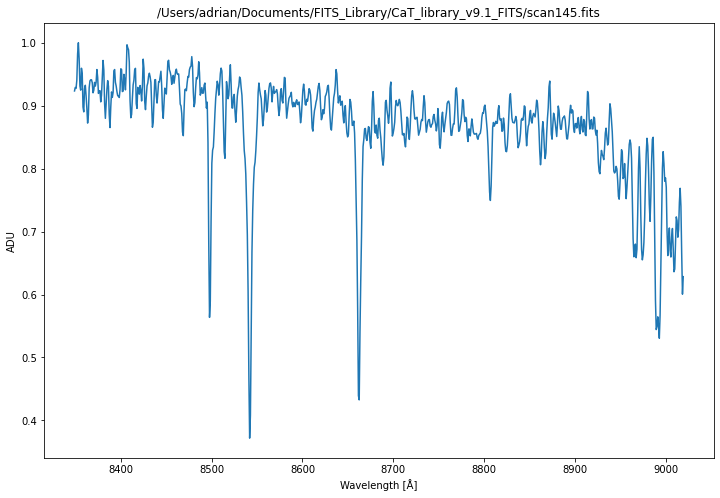

In [11]:
fig = plt.figure(1, figsize=(12, 8))
plt.plot(wave2, flux_ok)
plt.xlabel('Wavelength [Å]')
plt.ylabel('ADU')
plt.title(file)
plt.show()

## Customizing the data set

In [12]:
num = 1 # Number of files in the folder
dim1 = sp[0].header['NAXIS1'] # Dimension of each spectrum
for path, subdirs, files in os.walk(root):
    for nanme in files:
        num += 1
print(num)
print(dim1)

707
790


In [13]:
curves = 0
custom_set = np.zeros((num, dim1))
label_set = np.zeros((num, ), dtype=int)
spectra_set = [''] * num

for path, subdirs, files in os.walk(root):
    for name in files:
        file = [os.path.join(path, name)]
        str = " " 
        Ffile = (str.join(file))
        route = Path(name)
        Fname = route.with_suffix('')
        Fpng = route.with_suffix('.png')

        data, header = fits.getdata(Ffile, header=True)
        hdu_number = 0
        fits.getheader(Ffile, hdu_number)
        fits_file = Ffile
        
        with fits.open(fits_file, mode='readonly') as hdulist:
            hdulist.info()
            data = np.array(hdulist[0].data)
             
            data_norm = np.reshape(data/(np.nanmax(data)), (sp[0].header['NAXIS1']))

            
            label_set[curves] = curves
            spectra_set[curves] = name
            for i in range (dim1):
                custom_set[curves,i] = (data_norm[i])
        hdulist.close   
        curves += 1
   
            
#--------------------------------------------------------------------
        print ("Spectra loaded:",curves+1, "spectra");


Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan446.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 2 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 3 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan503.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 4 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan153.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 5 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_

Spectra loaded: 37 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan485.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 38 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan190.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 39 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan313.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 40 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan606.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 41 spectra
Filename: /Users/adrian/Documents

Spectra loaded: 72 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan309.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 73 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan165.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 74 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan535.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 75 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 76 spectra
Filename: /Users/adrian/Documents

Spectra loaded: 107 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan518.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 108 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan148.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 109 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan261.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 110 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan631.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 111 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 142 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan168.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 143 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan187.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 144 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan703.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 145 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan353.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 146 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 177 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan159.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 178 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan509.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 179 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan227.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 180 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan677.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 181 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 212 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan440.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 213 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 214 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan505.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 215 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan155.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 216 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 247 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan246.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 248 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan616.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 249 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan483.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 250 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan179.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 251 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 282 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan139.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 283 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan093.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 284 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan569.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 285 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan586.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 286 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 317 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan461.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 318 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 319 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan318.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 320 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan498.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 321 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 352 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan659.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 353 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan209.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 354 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan198.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 355 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan462.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 356 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 387 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan205.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 388 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan655.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 389 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan340.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 390 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan439.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 391 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 422 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan116.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 423 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan403.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 424 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan053.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 425 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan696.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 426 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 457 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan140.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 458 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan510.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 459 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 460 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan455.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 461 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 492 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan224.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 493 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan674.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 494 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan418.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 495 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan048.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 496 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 527 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan203.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 528 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan653.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 529 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan346.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 530 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan595.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 531 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 562 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan110.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 563 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan405.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 564 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan055.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 565 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan690.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 566 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 597 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan130.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 598 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan219.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 599 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan649.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 600 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan327.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 601 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 632 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan263.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 633 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan633.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 634 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan218.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 635 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan648.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 636 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 667 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan691.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 668 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan384.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 669 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan541.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 670 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan111.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 671 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 702 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan594.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 703 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan081.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 704 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan202.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 705 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan652.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 706 spectra
Filename: /Users/adrian/Docu

## Augmentation of the Dataset

In [14]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [15]:
label_set = np.asarray(label_set)

In [16]:
custom_set.shape

(707, 790)

In [17]:
label_set.shape

(707,)

In [18]:
augmentation = 50
custom_set = np.repeat(custom_set, augmentation, axis=0)
label_set = np.repeat(label_set, augmentation, axis=0)

In [19]:
custom_set.shape

(35350, 790)

In [20]:
label_set.shape

(35350,)

In [21]:
dataset = tf.data.Dataset.from_tensor_slices((custom_set, label_set))
dataset.element_spec

2024-02-03 18:05:20.411375: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(TensorSpec(shape=(790,), dtype=tf.float64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(custom_set,label_set,test_size=0.2,random_state=123)

## Autoencoder definition & training

In [24]:
import keras.backend as K

from tensorflow import keras
from tensorflow.keras import layers

from keras.layers import Dense, Input
from keras.models import Model

In [25]:
input_shape = (dim1,)
input_shape[0]

790

In [26]:
latent_dim = 6
intermediate_dim = int(dim1/latent_dim)

In [27]:
dim1

790

In [28]:
intermediate_dim

131

In [29]:
from tensorflow import keras
from tensorflow.keras import layers

from keras.layers import Dense, Input
from keras.models import Model

from tensorflow.keras import layers, losses


class Autoencoder(tf.keras.Model):
  def __init__(self, latent_dim, intermediate_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.intermediate_dim = intermediate_dim

    #encoder
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      Dense(intermediate_dim, activation='sigmoid', name='intermediate_layer_1'),
      Dense(intermediate_dim, activation='sigmoid', name='intermediate_layer_2'),
      Dense(latent_dim, activation='sigmoid', name='latent_space') 
    ])
    
    #decoder
    self.decoder = tf.keras.Sequential([
      Dense(intermediate_dim, activation='sigmoid', name='intermediate_layer_3'),
      Dense(input_shape[0], activation='sigmoid', name='latent_space'),
    #  layers.Reshape((dim1,))
    ])
    
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim, intermediate_dim)
    


In [30]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

## Training

In [31]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
884/884 [==============================] - 2s 2ms/step - loss: 0.0079 - val_loss: 0.0055
Epoch 2/100
884/884 [==============================] - 2s 2ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 3/100
884/884 [==============================] - 2s 2ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 4/100
884/884 [==============================] - 2s 2ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 5/100
884/884 [==============================] - 2s 2ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 6/100
884/884 [==============================] - 2s 2ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 7/100
884/884 [==============================] - 2s 2ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 8/100
884/884 [==============================] - 2s 2ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 9/100
884/884 [==============================] - 2s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/100
884/884 [==============================] - 2s 2ms/step - loss: 0.0014 - val_lo

In [32]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 790)               0         
                                                                 
 intermediate_layer_1 (Dense  (None, 131)              103621    
 )                                                               
                                                                 
 intermediate_layer_2 (Dense  (None, 131)              17292     
 )                                                               
                                                                 
 latent_space (Dense)        (None, 6)                 792       
                                                                 
Total params: 121,705
Trainable params: 121,705
Non-trainable params: 0
_________________________________________________________________


In [33]:
autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 intermediate_layer_3 (Dense  (None, 131)              917       
 )                                                               
                                                                 
 latent_space (Dense)        (None, 790)               104280    
                                                                 
Total params: 105,197
Trainable params: 105,197
Non-trainable params: 0
_________________________________________________________________


## Results for the test set

In [34]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [35]:
encoded_imgs[0]

array([0.7567597 , 0.3790827 , 0.19774003, 0.9794933 , 0.09828831,
       0.6890107 ], dtype=float32)

Text(0.5, 0, 'Decoded Spectra')

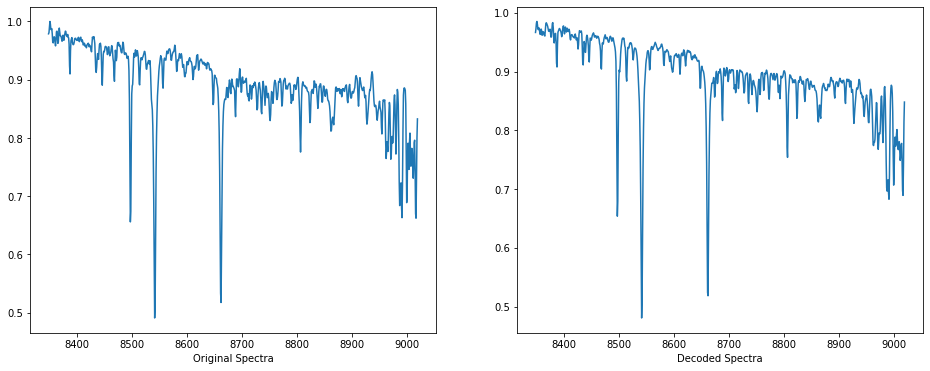

In [36]:
figure = 43
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(wave2, x_test[figure])
ax[0].set_xlabel('Original Spectra')   
ax[1].plot(wave2, decoded_imgs[figure])
ax[1].set_xlabel('Decoded Spectra')

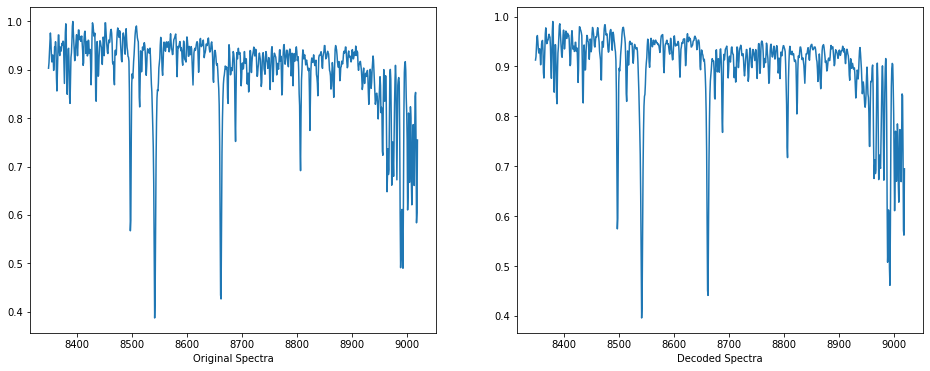

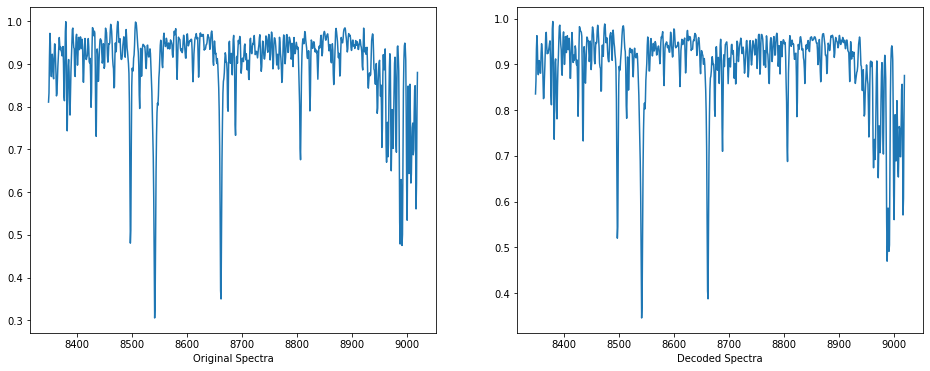

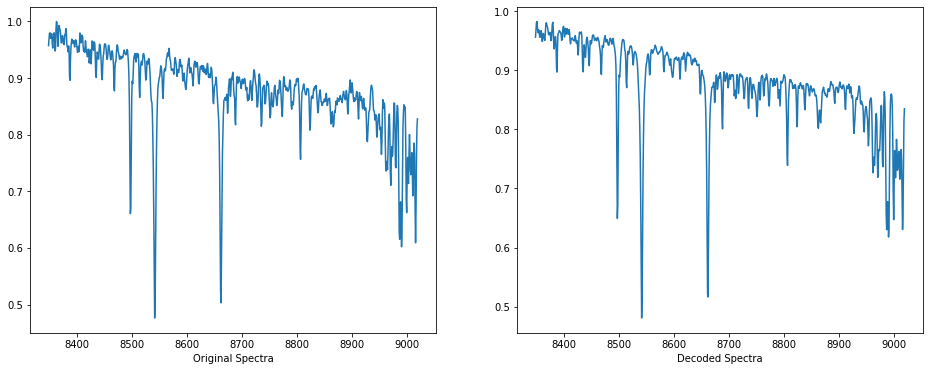

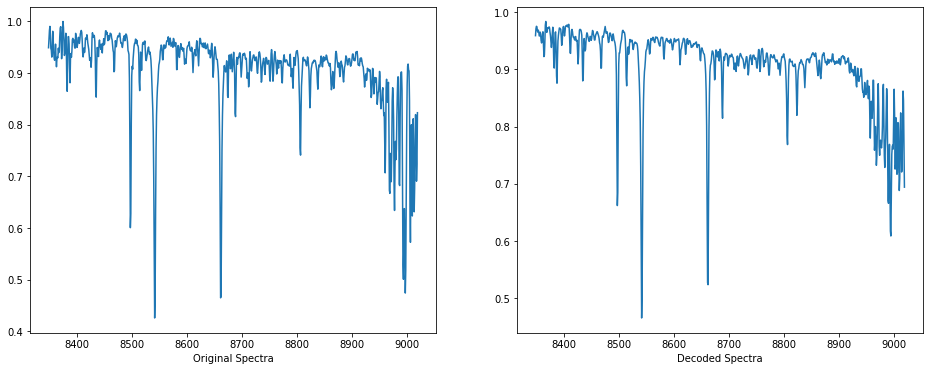

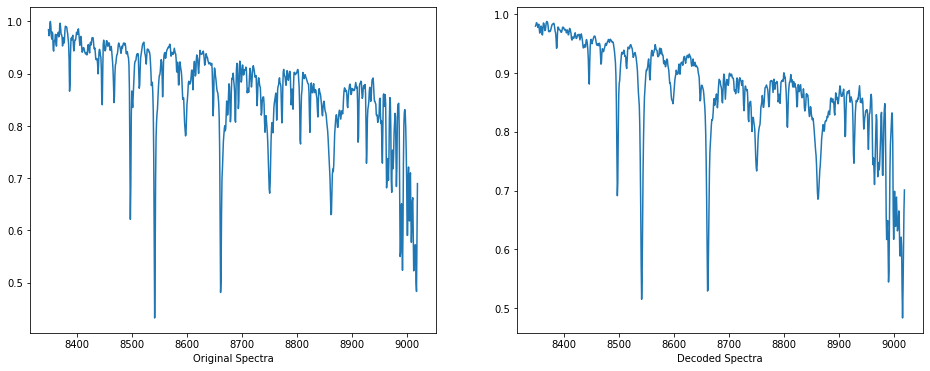

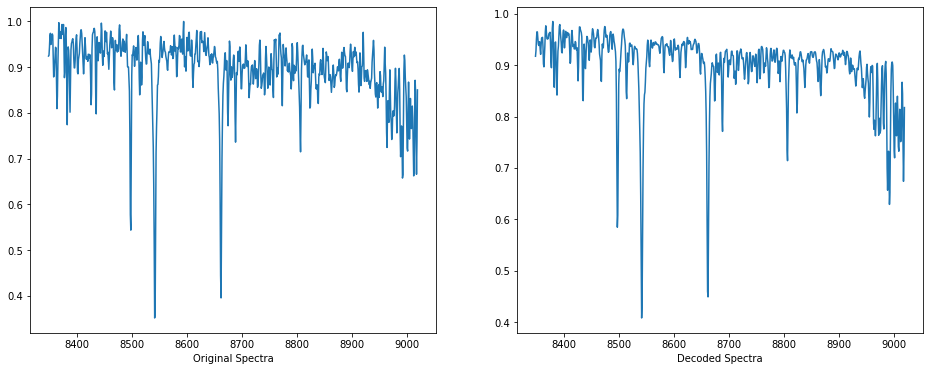

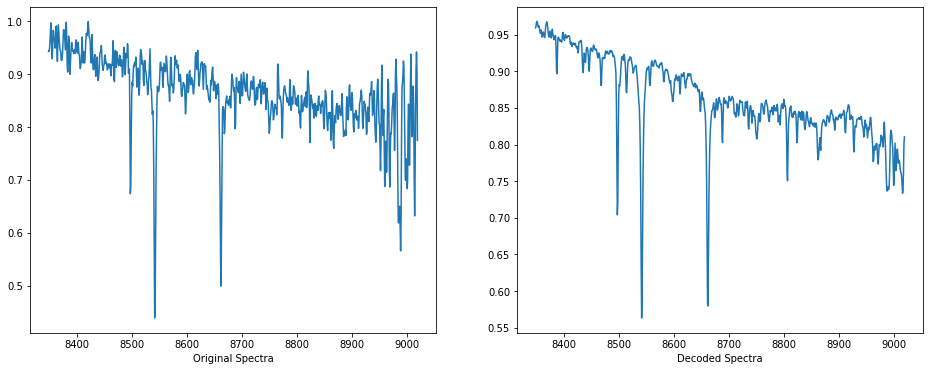

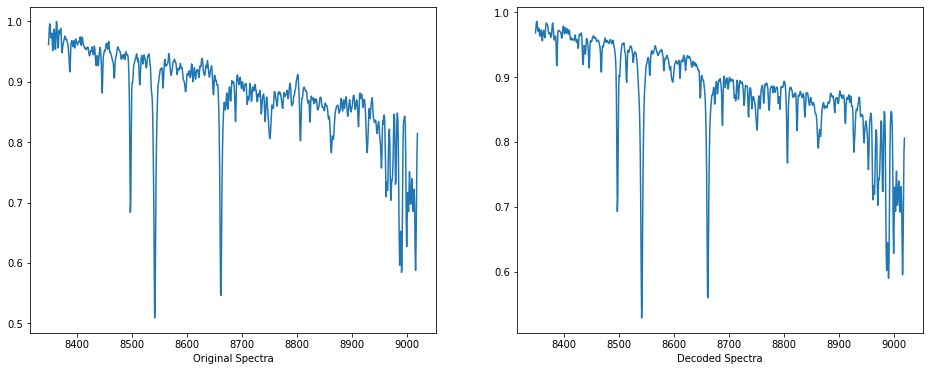

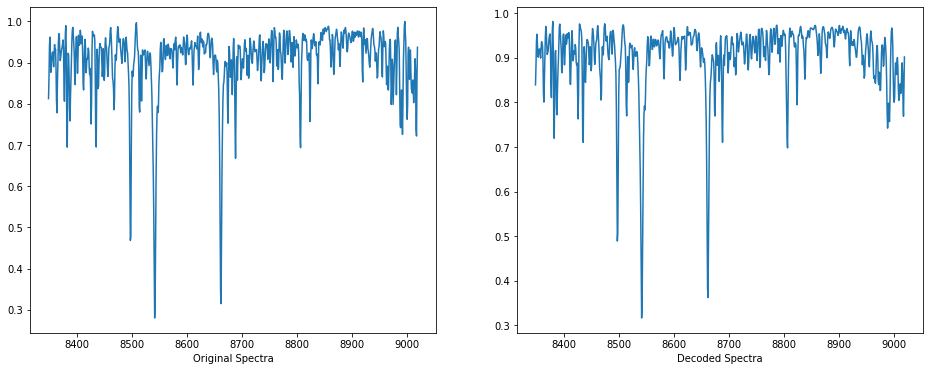

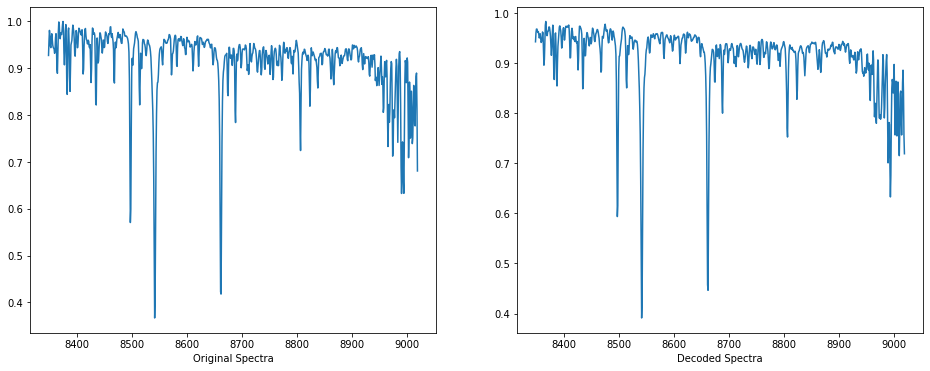

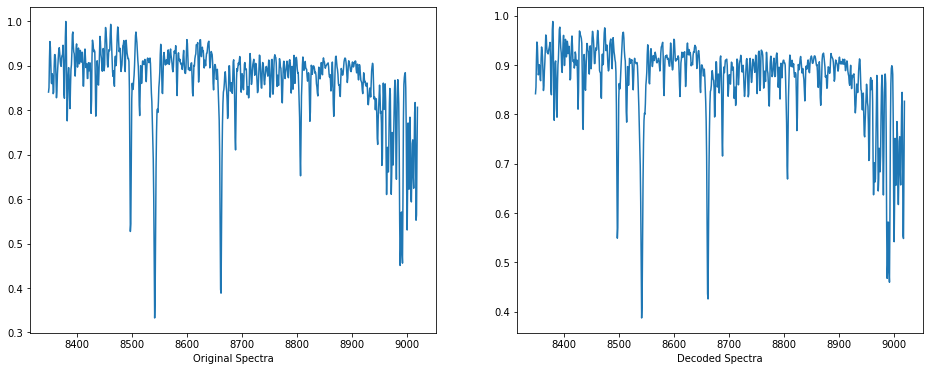

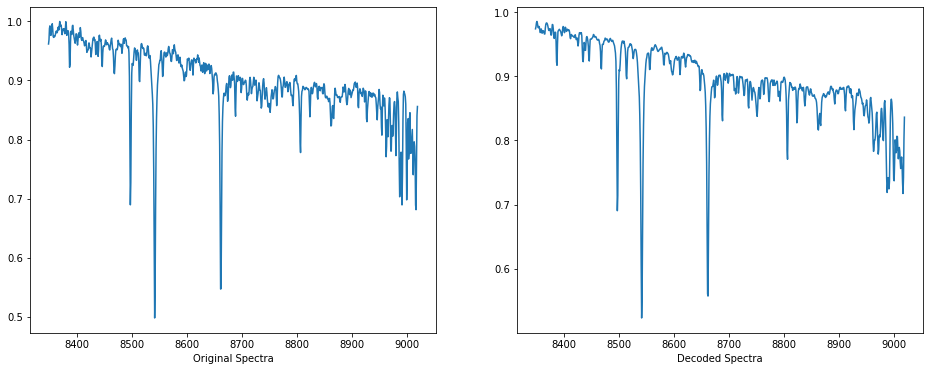

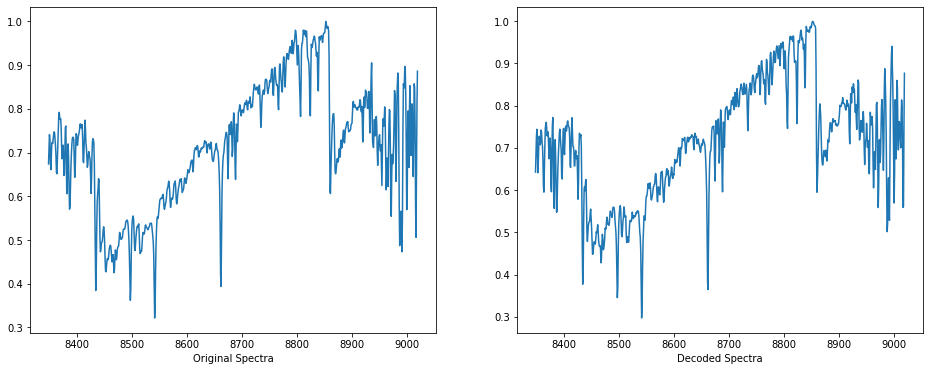

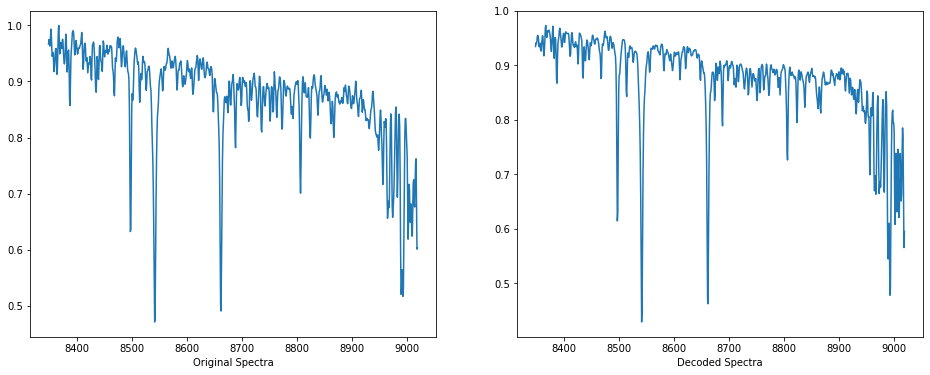

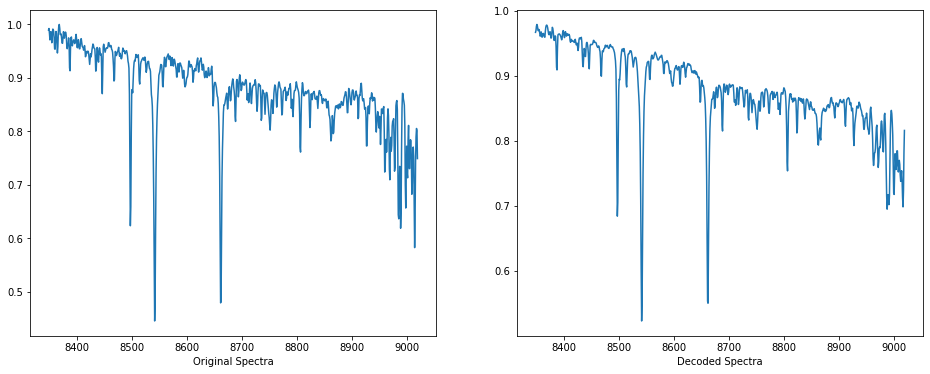

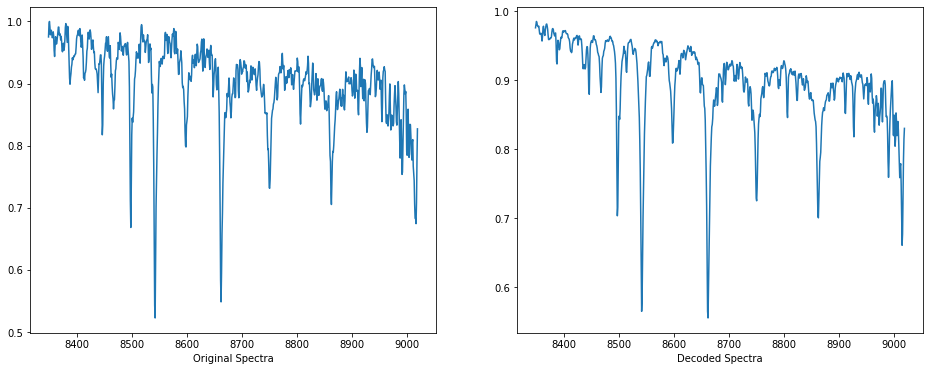

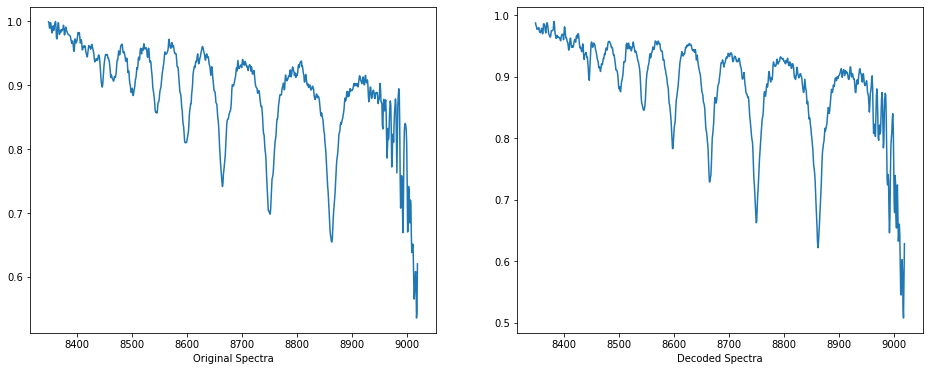

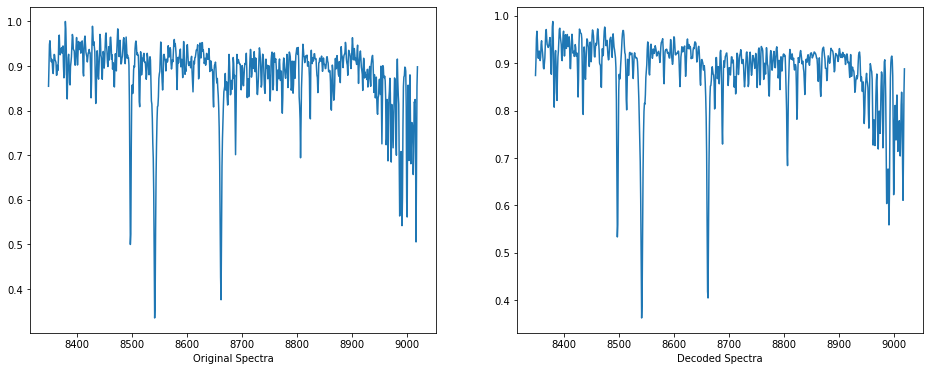

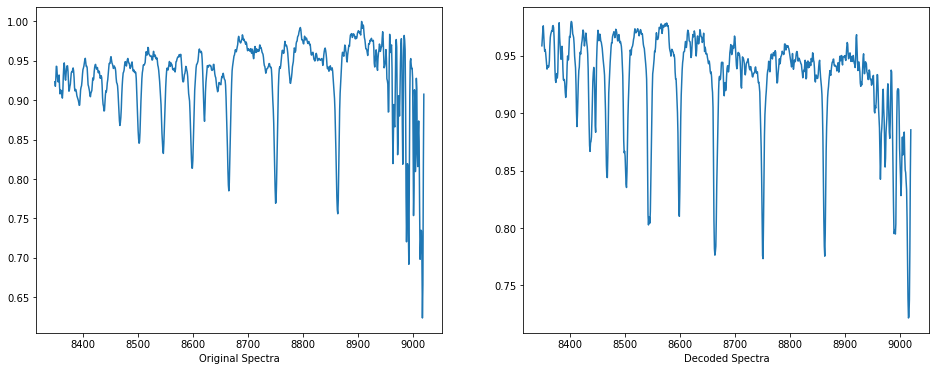

In [37]:
for m in range(20):
    figure = m
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].plot(wave2, x_test[figure])
    ax[0].set_xlabel('Original Spectra')   
    ax[1].plot(wave2, decoded_imgs[figure])
    ax[1].set_xlabel('Decoded Spectra')

plt.close(fig)

## Plotting distribution

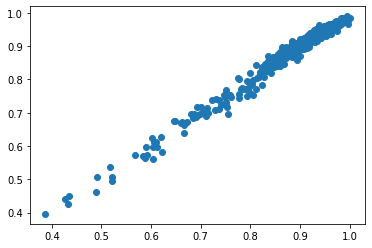

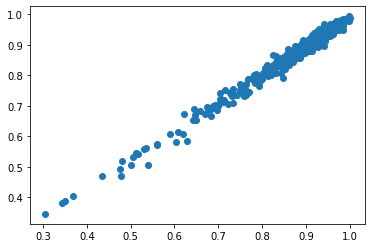

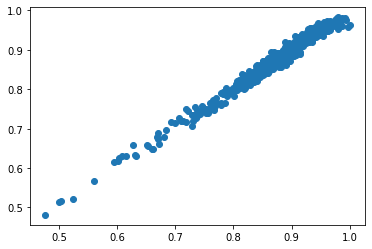

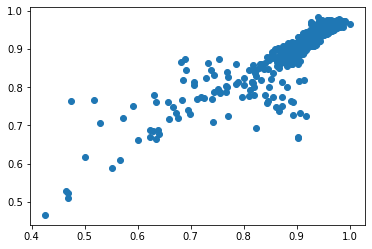

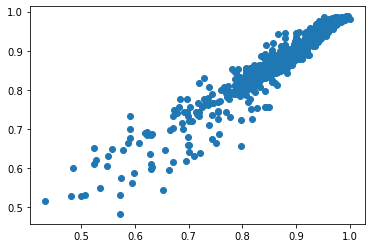

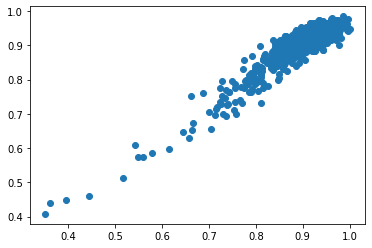

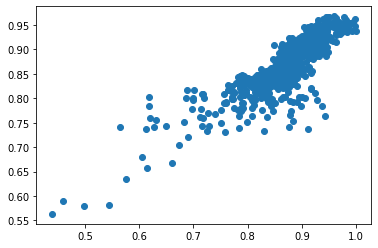

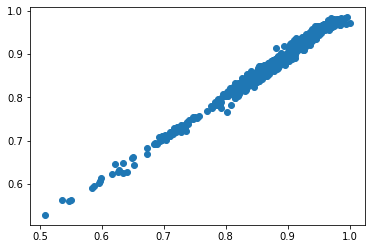

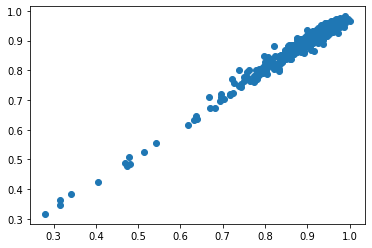

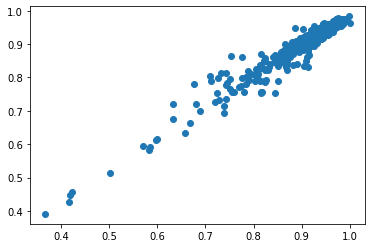

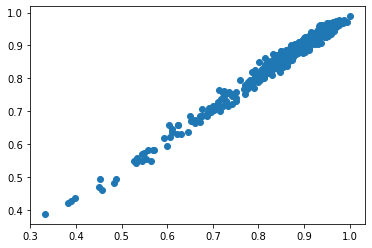

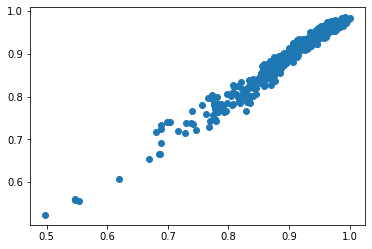

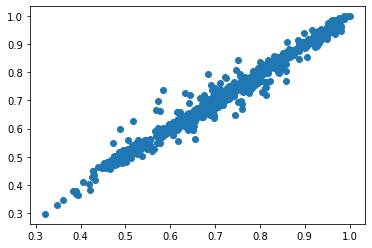

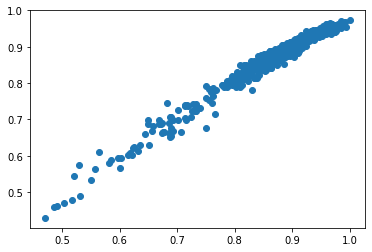

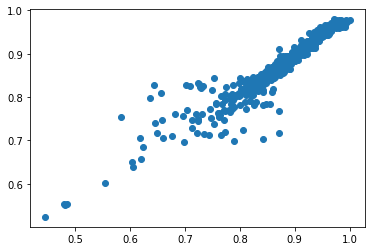

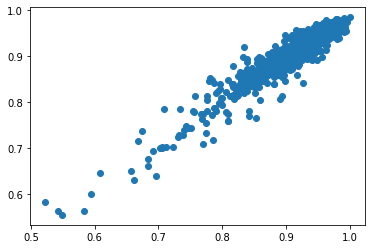

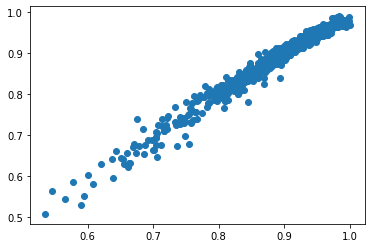

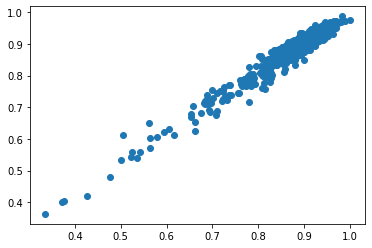

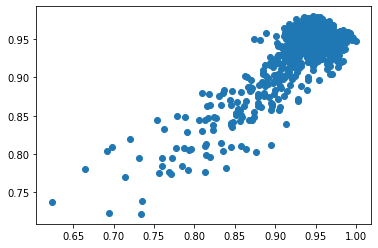

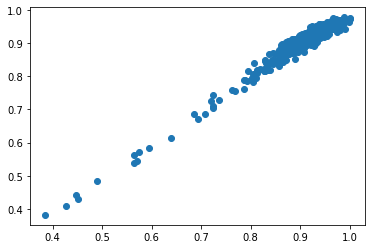

In [38]:
for sample in range(20):
    _ = plt.plot(x_test[sample], decoded_imgs[sample], 'o')
    plt.show()
#plt.savefig('train_R2.png')

In [39]:
encoded_imgs[figure]

array([0.8316172 , 0.40248874, 0.45509666, 0.9562554 , 0.16816023,
       0.4057472 ], dtype=float32)

In [40]:
np.shape(encoded_imgs)

(7070, 6)

## Monitoring the latent space

In [41]:
decoded_imgs[figure]

array([0.9063746 , 0.935218  , 0.96613026, 0.9740463 , 0.9606245 ,
       0.94376117, 0.942643  , 0.9495832 , 0.9524859 , 0.94924337,
       0.94174486, 0.9408627 , 0.9534768 , 0.95484585, 0.94829655,
       0.94993234, 0.9362659 , 0.8989245 , 0.88187444, 0.8988937 ,
       0.9262597 , 0.9634643 , 0.97898203, 0.97598857, 0.95973885,
       0.94537854, 0.944992  , 0.94448674, 0.9504277 , 0.9573051 ,
       0.9636867 , 0.9667904 , 0.9473993 , 0.900861  , 0.8845811 ,
       0.92908484, 0.96986204, 0.97772986, 0.937918  , 0.84202534,
       0.8102763 , 0.87890047, 0.93809646, 0.9434187 , 0.90725917,
       0.84201473, 0.8261467 , 0.87933   , 0.91483426, 0.9293003 ,
       0.9507195 , 0.9690144 , 0.97065216, 0.960763  , 0.9543039 ,
       0.940818  , 0.91278476, 0.9127578 , 0.9424476 , 0.9632042 ,
       0.964468  , 0.9444592 , 0.9219467 , 0.9373148 , 0.9627576 ,
       0.9629526 , 0.95286906, 0.9573945 , 0.9667312 , 0.964095  ,
       0.9604877 , 0.9684539 , 0.96626186, 0.93773615, 0.89172

In [42]:
np.shape(decoded_imgs)

(7070, 790)

## R square analysis

In [43]:
from sklearn.metrics import r2_score
r2_score(x_test, decoded_imgs, multioutput='variance_weighted')

0.9358879794154764

## Results for the train set 

In [44]:
encoded_imgs2 = autoencoder.encoder(x_train).numpy()
decoded_imgs2 = autoencoder.decoder(encoded_imgs2).numpy()

In [45]:
r2_score(x_train, decoded_imgs2, multioutput='variance_weighted')

0.9332105049516095

In [46]:
r2_score(x_train[43], decoded_imgs2[43], multioutput='variance_weighted')

0.9499246885276844

## Saving the model

In [47]:
autoencoder.save('2layers_6dim_CaT_autoencoder.tf',save_format='tf')

INFO:tensorflow:Assets written to: 2layers_6dim_CaT_autoencoder.tf/assets
